In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
car_price = pd.read_csv("/content/CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Exploratory Data Analysis

In [ ]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_price.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
car_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
col = car_price.select_dtypes(include = ["object"]).columns
for cols in col:
  print(f"{cols} : {car_price[cols].unique()}")

CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick o

In [ ]:
categorical_columns = car_price.select_dtypes(include=['object']).columns
numerical_columns = car_price.select_dtypes(include = ["float", "int64"]).columns
for col in categorical_columns:
    print(f"{col}: {car_price[col].unique()}")

CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick op

## Distribution of Target Variable

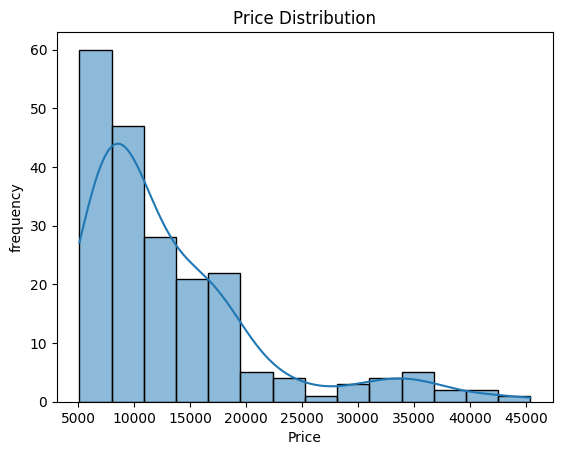

In [ ]:
sns.histplot(car_price["price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("frequency")
plt.show()

In [ ]:
car_price.select_dtypes(include =["object"]).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

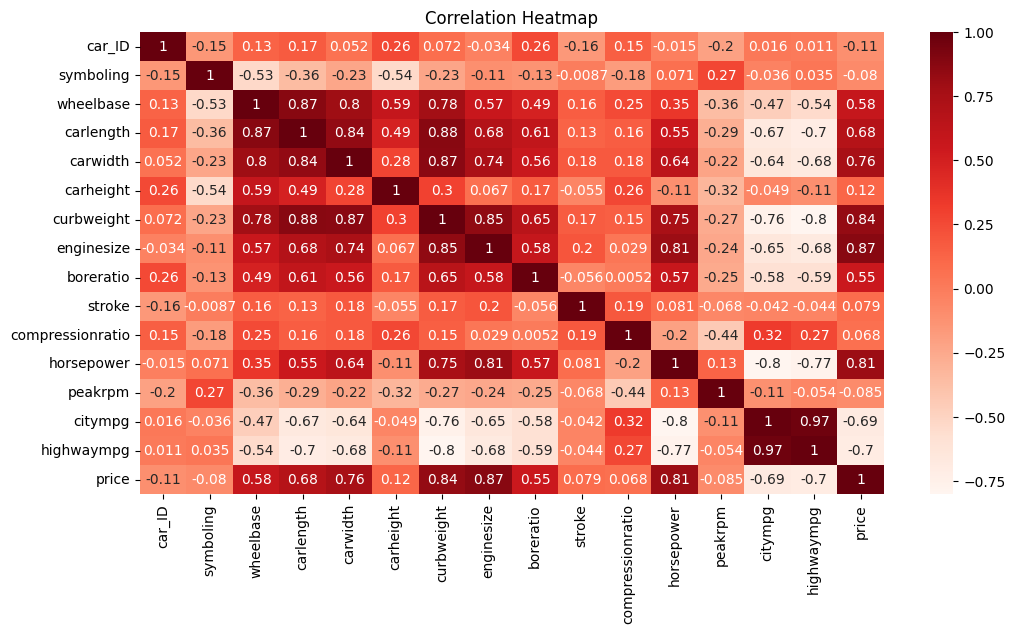

In [ ]:
car_cat = car_price.select_dtypes(include =["number"])
corr = car_cat.corr()

plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

##### We now encode the categorical variables using one-hot-encoding and scale the numeric features.  

In [ ]:
numerical_columns = numerical_columns.drop("price")
categorical_columns = categorical_columns.drop('CarName')
pre_processor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_columns), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])
x = car_price.drop(columns=["CarName","price"])
y = car_price["price"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


x_train = pre_processor.fit_transform(x_train)
x_test = pre_processor.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mean_square_error = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print(f"Mean Square Error: {mean_square_error}")
print(f"R2 Score: {r2score}")

Mean Square Error: 9229934.77655462
R2 Score: 0.8830825352736372


#### Mean squared error of 9229934.77 is the average squared difference between the actual value and the predicted car price. The R2 score of 88.3% indicates the proportion of variation in the dependent variable which is predictable from the independent variables, which is quite good.

#### We now try using Random Forest ensemble learning method to predict the price of the car. Upon using this method, it will reduce the risk of overfitting the data, it can capture the non-linear relationship between the dependent and independent variables

In [ ]:
random_forest = RandomForestRegressor(random_state=42)
cross_validation = cross_val_score(random_forest, x_train,y_train, cv=5, scoring='r2')
cross_val_mean = cross_validation.mean()
cross_val_std = cross_validation.std()

print(f"Cross Validation Mean: {cross_val_mean}")
print(f"Cross validation Standard Deviation: {cross_val_std}")

Cross Validation Mean: 0.8851178065478766
Cross validation Standard Deviation: 0.0742348932278623


In order to further improve the model's performance we use the grid search by finding the optimal combination of hyperparameters

In [23]:
Parameters = {
    'n_estimators': [150, 250, 350],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid= Parameters, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
Best Score: 0.8899173535021946


In [ ]:
Parameters = grid_search.best_params_
best_random_forest = RandomForestRegressor(**Parameters, random_state=42)
best_random_forest.fit(x_train,y_train)
y_pred_rftest=best_random_forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rftest)
r2 = r2_score(y_test, y_pred_rftest)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 3299677.784570282
R2 Score: 0.9582023090817693


On comparing the performance of both the models(linear regression and random forest) it is clear that the Random Forest has outperformed in both the metrics.

1.   It has significant lower MSE which indicates more accurate predictions
2.   The higher R2_Score indicates a better fit to the data



## Importance of the features that help in predictions

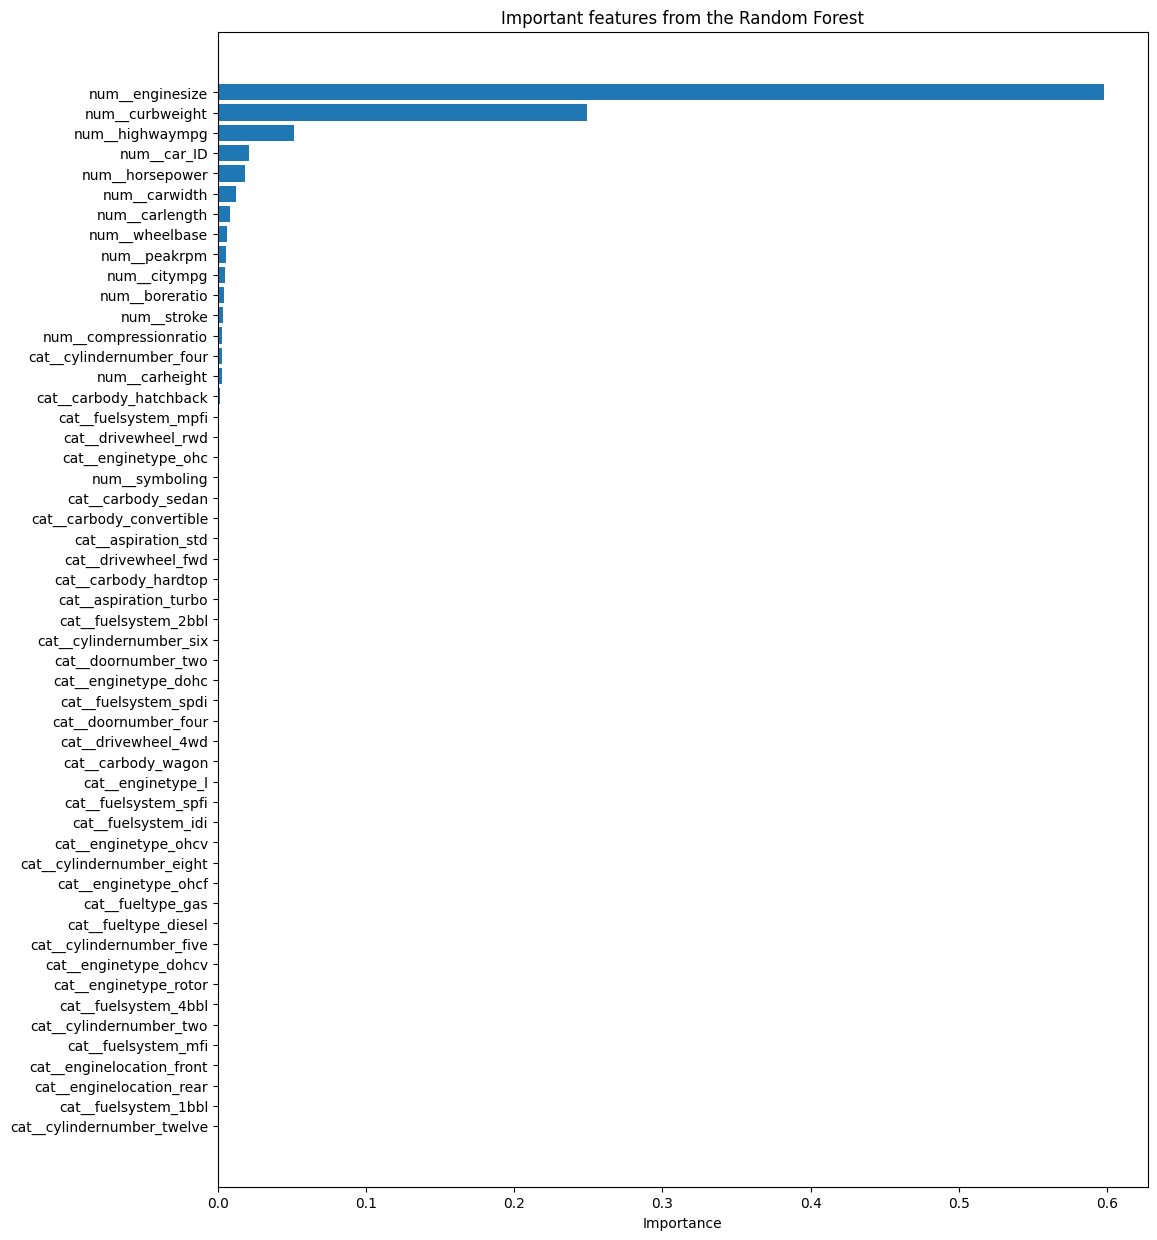

In [ ]:
importances = best_random_forest.feature_importances_
feature_names = pre_processor.get_feature_names_out()
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 15))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Importance')
plt.title('Important features from the Random Forest')
plt.gca().invert_yaxis()
plt.show()